In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 데이터 불러오기
tabelog_data_path = os.path.join('/content/drive/MyDrive/Test/data/tabelog_tokyo.xlsx')
google_data_path = os.path.join('/content/drive/MyDrive/Test/data/google_maps_results.xlsx')

tabelog_df = pd.read_excel(tabelog_data_path, sheet_name='output')
google_df = pd.read_excel(google_data_path)

# 데이터 미리보기
print(tabelog_df.head())
print(google_df.head())

# 구글 데이터의 'name' 컬럼을 'google_name'으로, 'rating'을 'google_rating'으로 변경
google_df = google_df.rename(columns={'name': 'google_name', 'rating': 'google_rating', 'user_ratings_total': 'google_user_ratings_total'})

# 'Not Found' 값을 NaN으로 대체
google_df.replace('Not Found', pd.NA, inplace=True)

# 'google_rating'과 'google_user_ratings_total'을 숫자로 변환
google_df['google_rating'] = pd.to_numeric(google_df['google_rating'], errors='coerce')
google_df['google_user_ratings_total'] = pd.to_numeric(google_df['google_user_ratings_total'], errors='coerce')

# 가게 이름을 기준으로 데이터프레임 합치기
merged_df = tabelog_df.merge(google_df, left_on='name', right_on='google_name', how='inner')

   Unnamed: 0                            name  rating  reviews  \
0           0                Ginza Chikamitsu    3.65      253   
1           1                Oden Oreno Dashi    3.54      495   
2           2  Kaisembuffedaininguginzahappou    3.27      168   
3           3         L'enfant coeur et coeur    3.32       54   
4           4                          Hinabe    3.01        3   

                         detail  
0  히가시긴자역 / 야키니쿠, 호르몬(내장), 소 요리  
1               긴자역 / 오뎅, 일본 요리  
2     신바시역 / 야키니쿠, 스시(초밥), 이자카야  
3           긴자역 / 프렌치, 이노베디부 요리  
4               긴자역 / 훠궈, 중화 요리  
                                                name  \
0                                   Ginza Chikamitsu   
1                                  Oden Ore-no Dashi   
2                     Kaisembuffedaininguginzahappou   
3  L’enfant coeur et coeur （ランファン クーエクー ）フレンチレストラ...   
4                                         HINABE-火鍋-   

                                             address     ratin

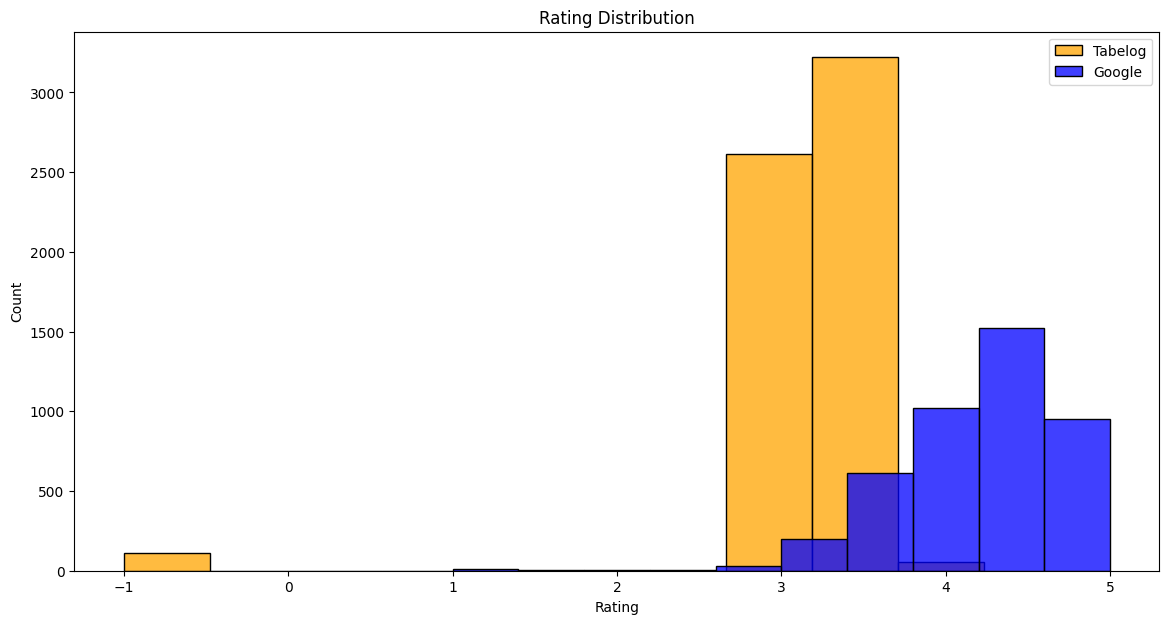

In [7]:
# 히스토그램 그리기
plt.figure(figsize=(14, 7))

# 타베로그 별점 분포
sns.histplot(tabelog_df['rating'], bins=10, kde=False, color='orange', label='Tabelog')
# 구글 별점 분포
sns.histplot(google_df['google_rating'], bins=10, kde=False, color='blue', label='Google')

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.legend()
plt.show()


Tabelog Rating and Reviews Correlation:
          rating  reviews
rating   1.00000  0.32484
reviews  0.32484  1.00000
Google Rating and User Ratings Total Correlation:
                           google_rating  google_user_ratings_total
google_rating                   1.000000                  -0.085705
google_user_ratings_total      -0.085705                   1.000000


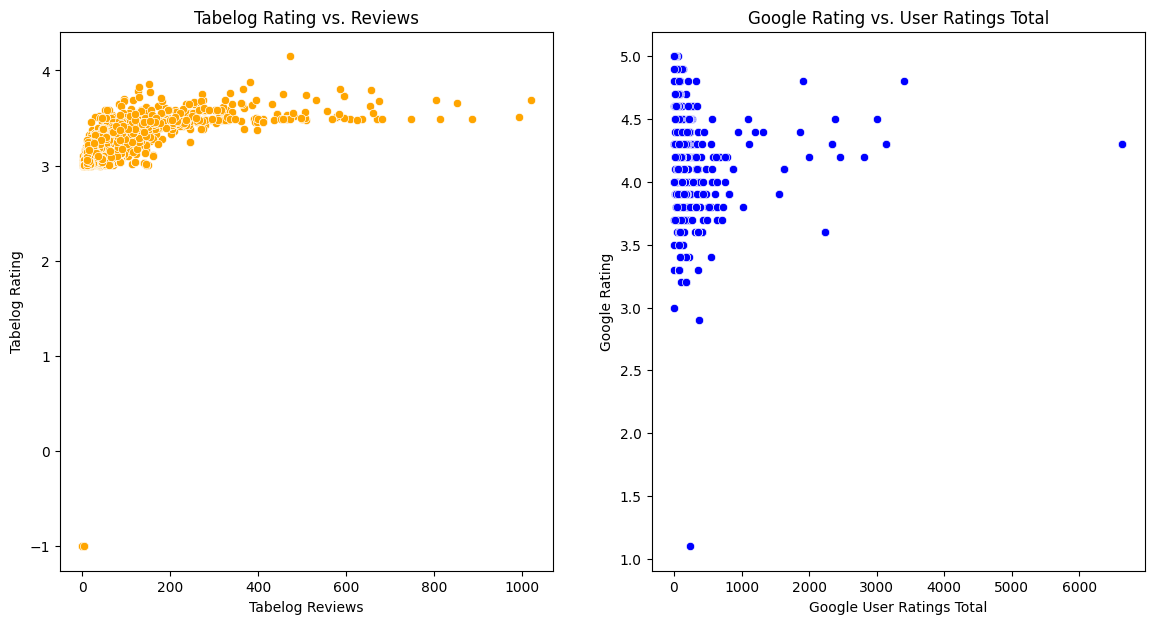

In [11]:
# 타베로그 데이터의 상관 관계
tabelog_corr = merged_df[['rating', 'reviews']].corr()
print("Tabelog Rating and Reviews Correlation:")
print(tabelog_corr)

# 구글 데이터의 상관 관계
google_corr = merged_df[['google_rating', 'google_user_ratings_total']].corr()
print("Google Rating and User Ratings Total Correlation:")
print(google_corr)

# 상관 관계 시각화
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x=merged_df['reviews'], y=merged_df['rating'], color='orange')
plt.xlabel('Tabelog Reviews')
plt.ylabel('Tabelog Rating')
plt.title('Tabelog Rating vs. Reviews')

plt.subplot(1, 2, 2)
sns.scatterplot(x=merged_df['google_user_ratings_total'], y=merged_df['google_rating'], color='blue')
plt.xlabel('Google User Ratings Total')
plt.ylabel('Google Rating')
plt.title('Google Rating vs. User Ratings Total')

plt.show()

In [12]:
# 평가 인원 수를 기준으로 가중치 계산
tabelog_weight = merged_df['reviews'] / (merged_df['reviews'] + merged_df['google_user_ratings_total'])
google_weight = merged_df['google_user_ratings_total'] / (merged_df['reviews'] + merged_df['google_user_ratings_total'])

# NaN 값을 처리하기 위해 가중치를 0으로 대체
tabelog_weight = tabelog_weight.fillna(0)
google_weight = google_weight.fillna(0)

# 종합 별점 계산
merged_df['combined_rating'] = tabelog_weight * merged_df['rating'] + google_weight * merged_df['google_rating']

# 결과 데이터프레임
result_df = merged_df[['name', 'google_name', 'rating', 'google_rating', 'reviews', 'google_user_ratings_total', 'combined_rating']]

# 결과 저장
result_path = os.path.join('/content/drive/MyDrive/Test/data/combined_ratings.xlsx')
result_df.to_excel(result_path, index=False)
print(f"Results saved to {result_path}")

Results saved to /content/drive/MyDrive/Test/data/combined_ratings.xlsx
